### tabel CO
- low	<=4000µgram/m3
- Medium 4001-8000µgram/m3
- High >8000µgram/m3

### tabel PM2.5
- low	<=15
- Medium 16-65
- High	>=66

### tabel ISPU
- good	0-50
- moderate	51-100
- unhealthy	>100
https://ditppu.menlhk.go.id/portal/read/indeks-standar-pencemar-udara-ispu-sebagai-informasi-mutu-udara-ambien-di-indonesia

D:\miniconda3\envs\tubes\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


       tanggal  pm25  co  Prediksi ISPU Kategori ISPU
0   2021-12-01   100  13      49.959386          Baik
1   2021-12-02    56   7      24.978131          Baik
2   2021-12-03    71   9      49.971880          Baik
3   2021-12-04    65  13      24.959397          Baik
4   2021-12-05    80  17      49.946894          Baik
5   2021-12-06    91  23      49.928159          Baik
6   2021-12-07    58  12      24.962519          Baik
7   2021-12-08    76  17      49.946894          Baik
8   2021-12-09    63  11      24.965641          Baik
9   2021-12-10    73  14      49.956263          Baik
10  2021-12-11    60   8      24.975008          Baik
11  2021-12-12    63  17      24.946913          Baik
12  2021-12-13    68  11      49.965633          Baik
13  2021-12-14    76  15      49.953140          Baik
14  2021-12-15   124  19      50.000000        Sedang
15  2021-12-16   136  20      50.000000          Baik
16  2021-12-17    81  18      49.943771          Baik
17  2021-12-18    69  18    

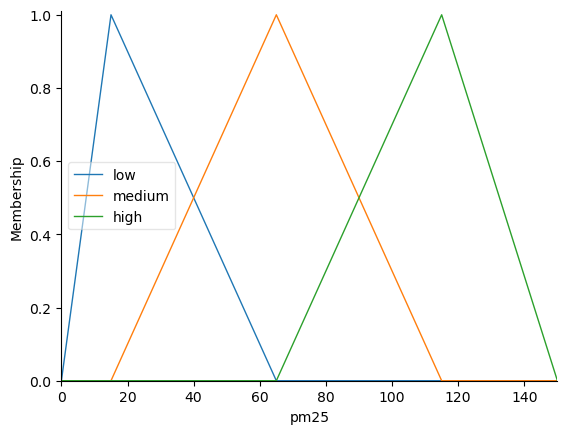

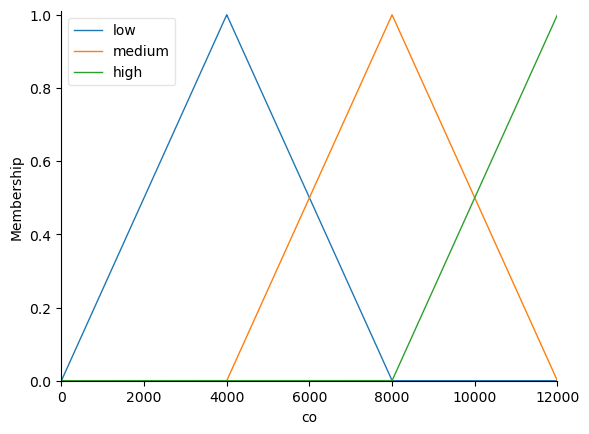

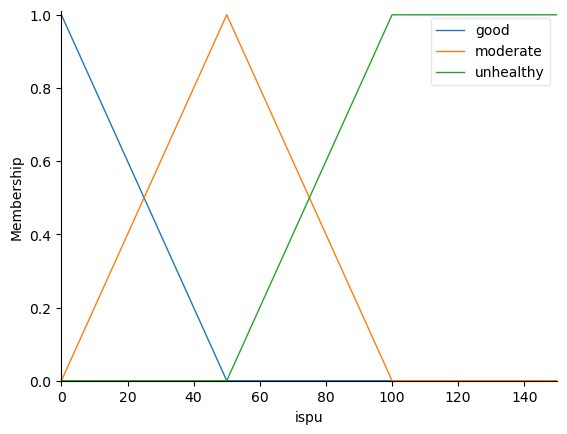

In [1]:
#Import Lib
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

#Membaca data dari file Excel ke dalam data frame
data = 'tubes AI\Desember\indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-desember-tahun-2021.csv'
data = pd.read_csv(data)  # Ganti 'data_input.xlsx' dengan nama file Excel Anda

#Membuat FIS dengan metode Tsukamoto
# Fuzzy variables
pm25 = ctrl.Antecedent(np.arange(0, 151, 1), 'pm25')
co = ctrl.Antecedent(np.arange(0, 12001, 1), 'co')
ispu = ctrl.Consequent(np.arange(0, 151, 1), 'ispu')

# buat fungsi keanggotaan PM2.5 berdasarkan tabel PM2.5
pm25['low'] = fuzz.trimf(pm25.universe, [0, 15, 65])
pm25['medium'] = fuzz.trimf(pm25.universe, [15, 65, 115])
pm25['high'] = fuzz.trimf(pm25.universe, [65, 115, 150])

# buat fungsi keanggotaan CO berdasarkan tabel CO
co['low'] = fuzz.trimf(co.universe, [0, 4000, 8000])
co['medium'] = fuzz.trimf(co.universe, [4000, 8000, 12000])
co['high'] = fuzz.trimf(co.universe, [8000, 12000, 12000])

# buat fungsi keanggotaan ispu berdasarkan tabel ispu
ispu['good'] = fuzz.trimf(ispu.universe, [0, 0, 50])
ispu['moderate'] = fuzz.trimf(ispu.universe, [0, 50, 100])
ispu['unhealthy'] = fuzz.trapmf(ispu.universe, [50, 100, 150, 150])

#Memunculkan grafik fungsi keanggotaan
pm25.view()
co.view()
ispu.view()

# Aturan-aturan fuzzy
rule1 = ctrl.Rule(pm25['low'] & co['low'], ispu['good'])
rule2 = ctrl.Rule(pm25['low'] & co['medium'], ispu['good'])
rule3 = ctrl.Rule(pm25['low'] & co['high'], ispu['moderate'])
rule4 = ctrl.Rule(pm25['medium'] & co['low'], ispu['good'])
rule5 = ctrl.Rule(pm25['medium'] & co['medium'], ispu['moderate'])
rule6 = ctrl.Rule(pm25['medium'] & co['high'], ispu['moderate'])
rule7 = ctrl.Rule(pm25['high'] & co['low'], ispu['moderate'])
rule8 = ctrl.Rule(pm25['high'] & co['medium'], ispu['unhealthy'])
rule9 = ctrl.Rule(pm25['high'] & co['high'], ispu['unhealthy'])


#Membuat Fuzzy Inference System
fis = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
fis_simulator = ctrl.ControlSystemSimulation(fis)

#Inferensi fuzzy dan menampilkan hasil ISPU
results = []
for index, row in data.iterrows():
    fis_simulator.input['pm25'] = row['pm25']
    fis_simulator.input['co'] = row['co']
    fis_simulator.compute()
    ispu_prediction = fis_simulator.output['ispu']

    # Menentukan status keanggotaan ISPU
    if ispu_prediction <= 50:
        status_ispu = "Baik"
    elif 50 < ispu_prediction <= 100:
        status_ispu = "Sedang"
    else:
        status_ispu = "Tidak Sehat"

    result_dict = {
        'tanggal' : row['tanggal'],
        'pm25': row['pm25'],
        'co': row['co'],
        'Prediksi ISPU': ispu_prediction,
        'Kategori ISPU': status_ispu
    }
    results.append(result_dict)

# Convert Data ke Dataframe
result_df = pd.DataFrame(results)

# Memunculkan Dataframe
print(result_df)


In [2]:
result_df

,tanggal,pm25,co,Prediksi ISPU,Kategori ISPU
0,2021-12-01,100,13,49.959386,Baik
1,2021-12-02,56,7,24.978131,Baik
2,2021-12-03,71,9,49.971880,Baik
3,2021-12-04,65,13,24.959397,Baik
4,2021-12-05,80,17,49.946894,Baik
5,2021-12-06,91,23,49.928159,Baik
6,2021-12-07,58,12,24.962519,Baik
7,2021-12-08,76,17,49.946894,Baik
8,2021-12-09,63,11,24.965641,Baik
9,2021-12-10,73,14,49.956263,Baik
